# DECISION TREE

Objective:

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

## Task


1. Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [228]:
df=pd.read_csv('/content/heart_disease(Heart_disease).csv')

In [229]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.6+ KB


In [231]:

df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [232]:
df.dtypes

,0
age,float64
sex,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64
exang,object
oldpeak,float64


In [233]:
### missing values
df.isnull().sum()

,0
age,91
sex,91
cp,91
trestbps,91
chol,91
fbs,91
restecg,91
thalch,91
exang,91
oldpeak,153


In [234]:
### drop rows that are empty
df.dropna(how='all', inplace=True)

In [235]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 99.3+ KB


##2. Exploratory Data Analysis (EDA)


Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [237]:
df.isnull().sum().sum()/len(df)*100
### more than 5%, so we cannot just drop the columns

np.float64(6.828193832599119)

In [238]:
df.fillna({'oldpeak':df.oldpeak.mean()},inplace=True)


In [239]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [240]:
### checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [241]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [242]:
df.duplicated().sum()

np.int64(0)

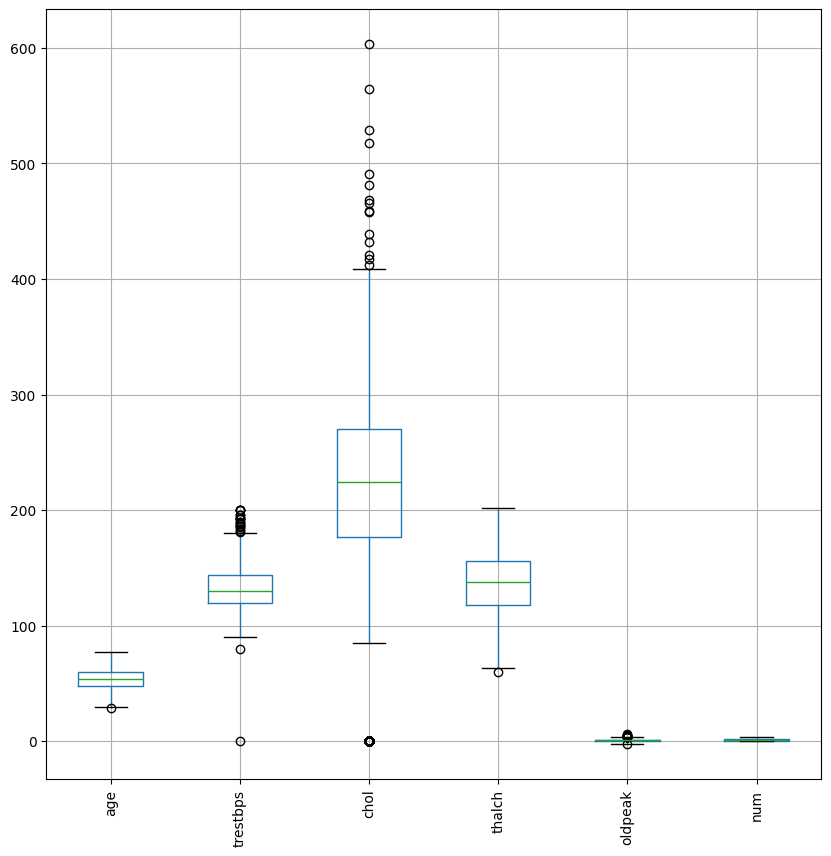

In [243]:
### checking outliers in the data
df.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

In [244]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

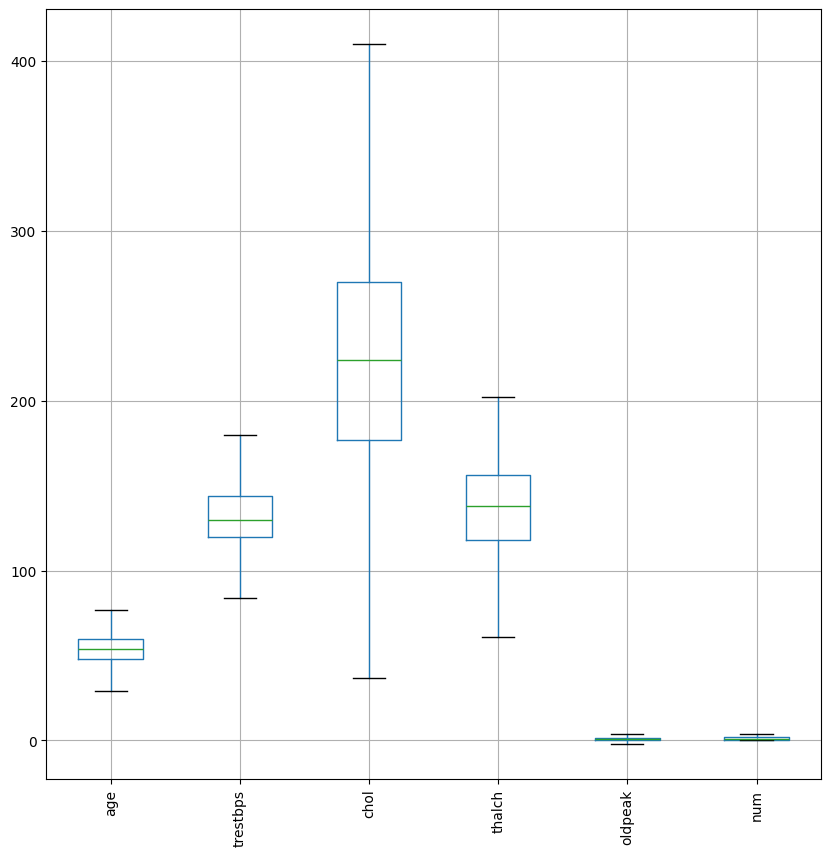

In [245]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

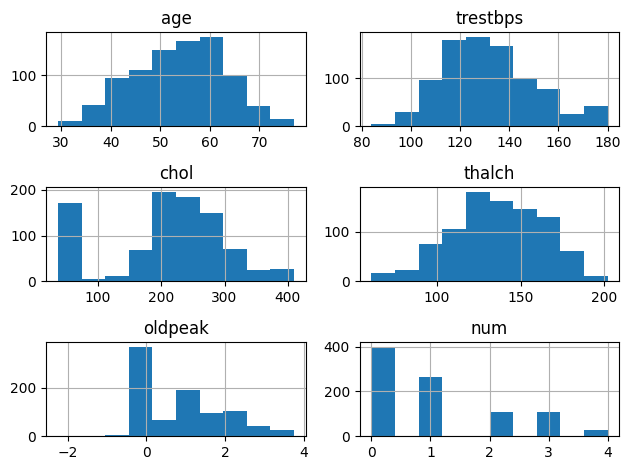

In [246]:
df.hist()
plt.tight_layout()
plt.show()

#3) Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [247]:
target=df[['num']]
features=df.drop(columns=['num'])

In [248]:
target.head()

,num
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [249]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect


In [250]:
df.dtypes

,0
age,float64
sex,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64
exang,object
oldpeak,float64


#Labelling


In [251]:
ord_enc=OrdinalEncoder()

In [252]:
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','thal']

In [253]:
features[categorical_cols] = features[categorical_cols].astype(str)
features[categorical_cols] = ord_enc.fit_transform(features[categorical_cols])

In [254]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0
1,41.0,1.0,1.0,135.0,203.0,0.0,1.0,132.0,0.0,0.0,1.0,0.0
2,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0
3,52.0,1.0,3.0,118.0,186.0,0.0,0.0,190.0,0.0,0.0,1.0,0.0
4,57.0,1.0,0.0,110.0,201.0,0.0,1.0,126.0,1.0,1.5,1.0,0.0


Scaling

In [255]:
std_scaler=StandardScaler()

In [256]:
features[['age','trestbps','chol','thalch','oldpeak']] = std_scaler.fit_transform(features[['age','trestbps','chol','thalch','oldpeak']])

In [257]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006104,1.0,3.0,0.607417,0.264845,1.0,0.0,0.524203,0.0,1.391088,0.0,0.0
1,-1.397775,1.0,1.0,0.089009,-0.045006,0.0,1.0,-0.147763,0.0,-0.864563,1.0,0.0
2,0.350500,1.0,0.0,0.348213,-0.158618,0.0,1.0,0.449540,0.0,-0.472276,1.0,0.0
3,-0.195836,1.0,3.0,-0.792285,-0.220589,0.0,0.0,2.017461,0.0,-0.864563,1.0,0.0
4,0.350500,1.0,0.0,-1.207012,-0.065663,0.0,1.0,-0.371752,1.0,0.606514,1.0,0.0


In [258]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [259]:
df.shape

(908, 13)

<Figure size 1500x1000 with 0 Axes>

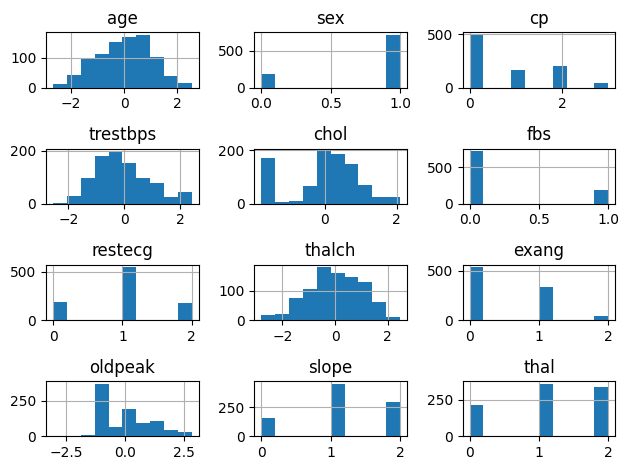

In [260]:
plt.figure(figsize=(15,10))
features.hist()
plt.tight_layout()
plt.show()

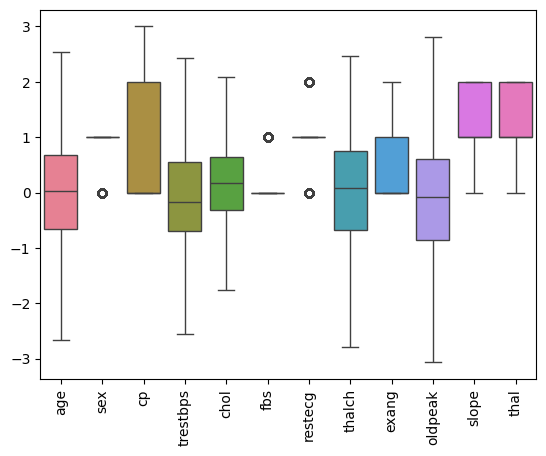

In [261]:
sns.boxplot(data=features)
plt.xticks(rotation=90)
plt.show()

In [262]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in features.select_dtypes(['int','float']).columns:
    outlier_capping(features,col)
# Each and every column is selected and done outlier capping

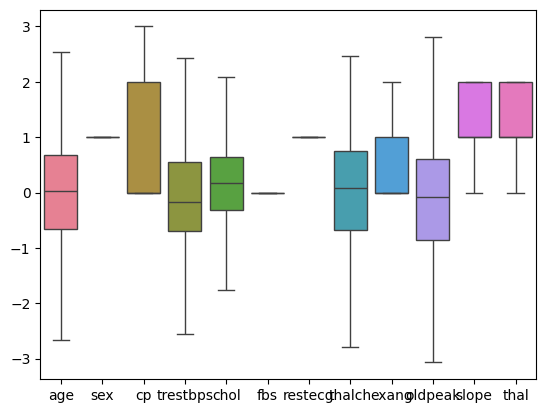

In [263]:
sns.boxplot(data=features)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

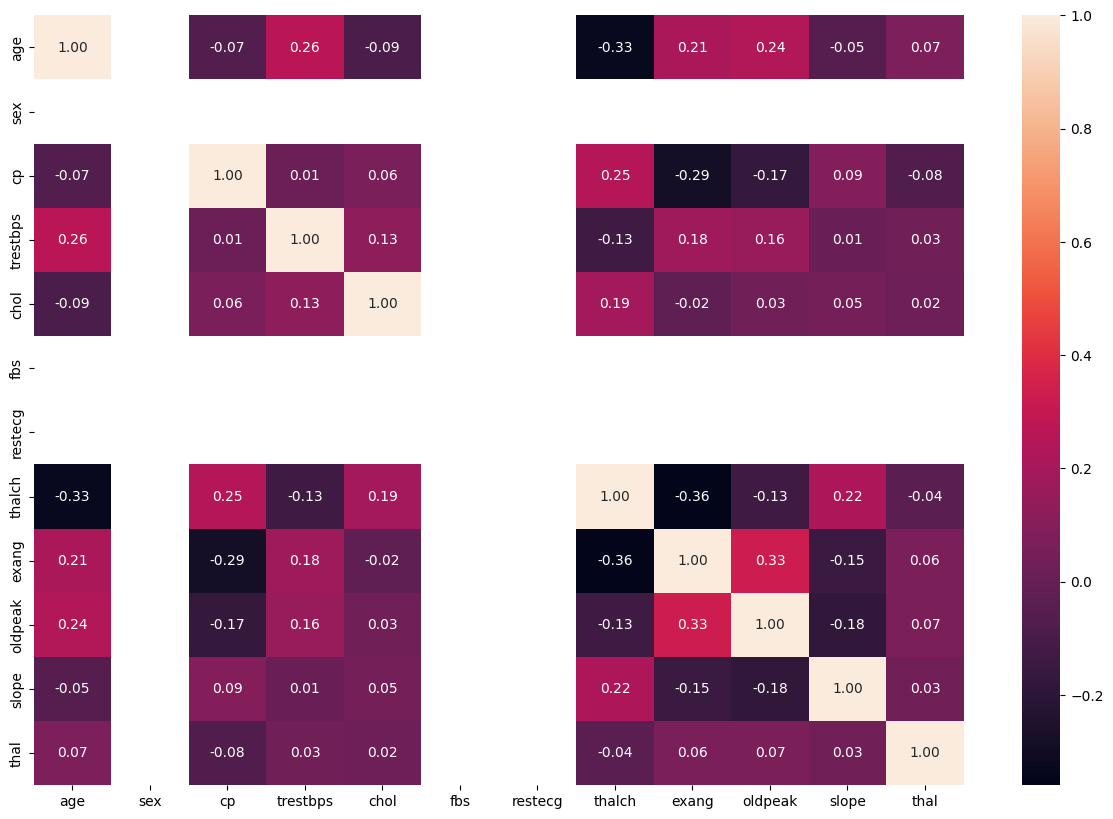

In [264]:
corr=features.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show

In [265]:
### most of the features have very correlation with every other features, so we are going to do f_classification

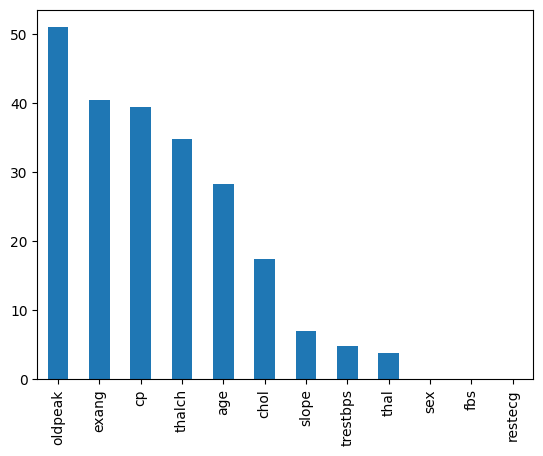

In [267]:
f_class=f_classif(features,target)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [269]:
features.drop(columns=['sex','fbs','restecg'],inplace=True)

In [270]:
features.head()

,age,cp,trestbps,chol,thalch,exang,oldpeak,slope,thal
0,1.006104,3.0,0.607417,0.264845,0.524203,0.0,1.391088,0.0,0.0
1,-1.397775,1.0,0.089009,-0.045006,-0.147763,0.0,-0.864563,1.0,0.0
2,0.350500,0.0,0.348213,-0.158618,0.449540,0.0,-0.472276,1.0,0.0
3,-0.195836,3.0,-0.792285,-0.220589,2.017461,0.0,-0.864563,1.0,0.0
4,0.350500,0.0,-1.207012,-0.065663,-0.371752,1.0,0.606514,1.0,0.0


In [271]:
### Feature engineering has been completed . We removed three features which had very low correlation with the target.

#4) Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split)

In [272]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 9)
(182, 9)
(726, 1)
(182, 1)


Implement a Decision Tree Classification model using a library like scikit-learn.

In [273]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5,min_samples_split=2)

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC)

In [274]:
dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)

In [275]:
accuracy_score(y_test, y_pred)

0.5274725274725275

In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.84      0.76        80
         1.0       0.48      0.42      0.44        53
         2.0       0.23      0.14      0.17        22
         3.0       0.15      0.19      0.17        21
         4.0       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.31      0.32      0.31       182
weighted avg       0.49      0.53      0.50       182



#5) Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion

In [277]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,7),'min_samples_split':[0,1,2,3,4,5]}

In [278]:
grid_search=GridSearchCV(estimator=dec_tree,param_grid=params,cv=5)

In [279]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 7),
                         'min_samples_split': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [280]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

In [282]:
grid_search.best_score_

np.float64(0.5646764289088332)

#6) Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

In [285]:
dec_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=2,splitter='random')

In [286]:
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.510989010989011

Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [288]:
x_train.head()

,age,cp,trestbps,chol,thalch,exang,oldpeak,slope,thal
249,-0.632904,0.0,-0.688604,0.481741,-0.969055,0.0,-0.864563,0.0,2.0
255,-0.414370,1.0,1.903437,0.016964,-0.745067,0.0,-0.864563,1.0,0.0
115,-2.053378,1.0,-0.584922,-0.158618,1.420158,0.0,-0.864563,2.0,1.0
382,0.459768,0.0,-0.118355,1.834759,-0.371752,2.0,0.009505,1.0,2.0
275,-1.616309,0.0,-1.207012,0.677980,-0.147763,0.0,-0.864563,0.0,1.0


In [289]:
class_names_str = [str(x) for x in target.num.unique()]

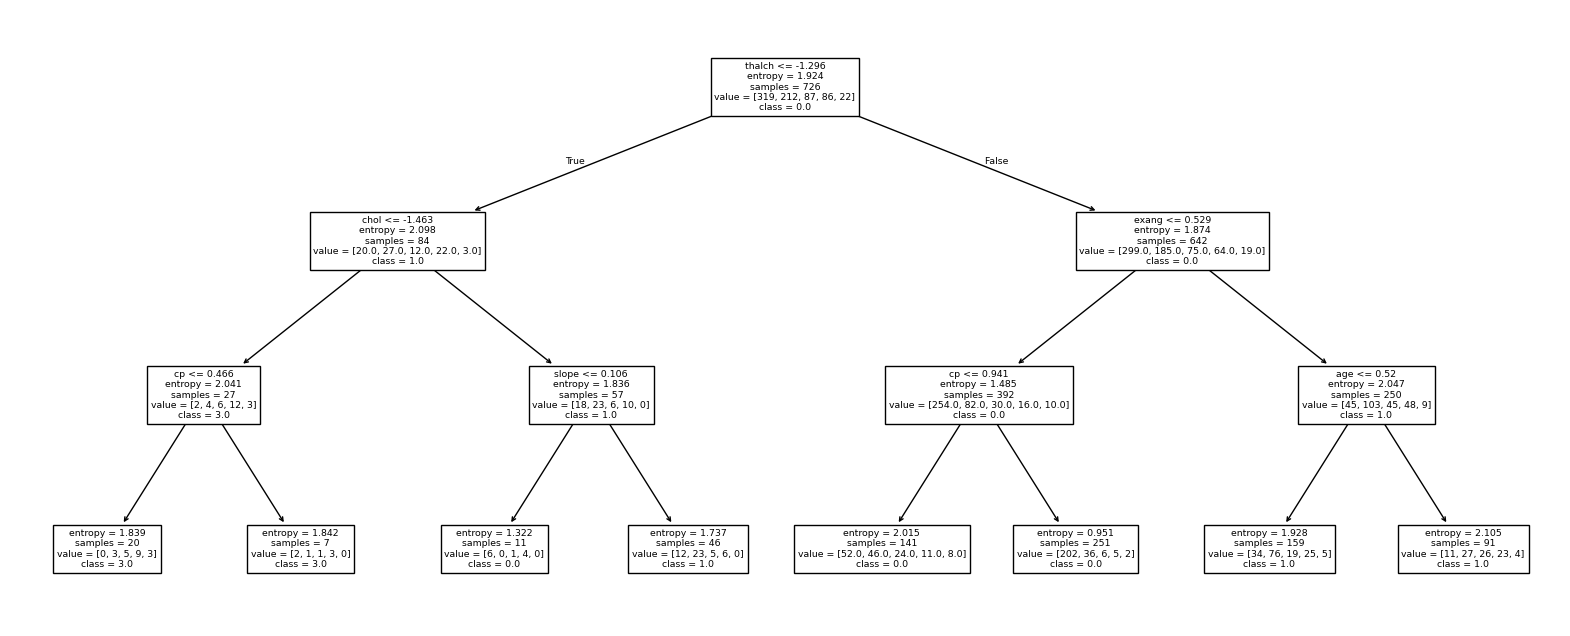

In [291]:
plt.figure(figsize=(20,8))
plot_tree(dec_tree,feature_names=x_train.columns,class_names=class_names_str)
plt.show()

#Interview questions

1) What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Some common hyperparameters of decision tree models are
1) criterion - measures split quality (gini or entropy)
2) max_depth - Limits tree depth, small -> underfit, large -> overfit
3) splitter - best or random split, affects accuracy

2) What is the difference between the Label encoding and One-hot encoding?

Label encoding converts each category into a unique order and is suitable for ordinal data where the order matters.
One-hot encoding seperates binary columns for each category and is preferred for nominal data with no natural order, avoiding any misleading numeric relationship.